In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# First taste of posterior probabilities

## Context:
Imagine a 4 sided globe where you toss and try to figure out what proportion of the globe is made of water (p). W is the number of Water observations, and L is the number of Land observations.

In [40]:
sample = [
    "W",
    "L",
    "W",
    "W",
    "W",
    "L",
    "W",
    "L",
    "W"
]

In [41]:
len(sample)

9

In [42]:
sum_w = len(list(filter(lambda x: x == "W", sample)))
sum_w

6

In [43]:
sum_l = len(list(filter(lambda x: x == "L", sample)))
sum_l

3

In [44]:
p_list = [0, 0.25, 0.5, 0.75, 1]

In [45]:
def basic_nominal_posterior(sample:list, p:float, w:int, l:int):
    """
    Posterior distribution for the Garden of forks problem

    p is the proportion of water on the 4 sided globe
    w is the number of water observations
    l is the number of land observations
    
    """
    return ((4 * p) ** w) * ((4- 4 * p) ** l)

In [65]:
posterior_out = {}

for p in p_list:
    posterior = basic_nominal_posterior(sample, p, sum_w, sum_l)
    posterior_out[p] = posterior




In [66]:
posterior_out

{0: 0, 0.25: 27.0, 0.5: 512.0, 0.75: 729.0, 1: 0}

In [67]:
729/1268

0.5749211356466877

In [68]:
# Convert number of possible outcomes to probabilities
total_num_outcomes = sum(posterior_out.values())
for p, v in posterior_out.items():
    posterior_out[p] = v / total_num_outcomes


In [69]:
posterior_out.values()

dict_values([0.0, 0.021293375394321766, 0.4037854889589905, 0.5749211356466877, 0.0])

In [70]:
sum(posterior_out.values())

1.0

Text(0, 0.5, 'Posterior Probabilities')

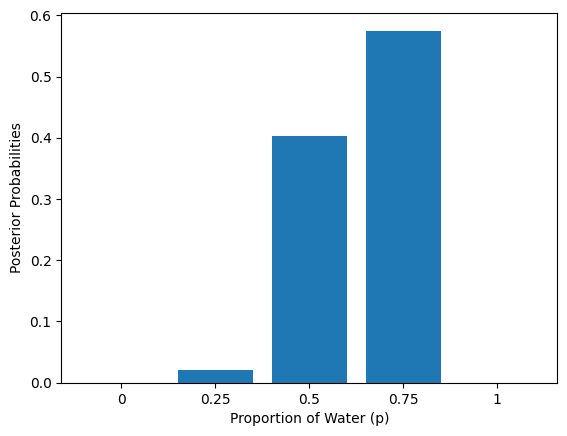

In [71]:
plt.bar(range(len(posterior_out)), posterior_out.values(), align='center')
plt.xticks(range(len(posterior_out)), posterior_out.keys())
plt.xlabel("Proportion of Water (p)")
plt.ylabel("Posterior Probabilities")

In [ ]:
# Validate that sum of all posterior probabilities is 1

sum(posterior_out.values())

1.0

# Implement Generative Model

In [89]:
def globe_sampling(p, N=10):
    """
    Simulate N tosses of the 4 sided globe
    """
    return np.random.choice(a = ["W", "L"], size=int(N), p=[p, 1-p])


In [90]:
globe_sampling(0.5, 10)

array(['L', 'L', 'W', 'W', 'W', 'W', 'L', 'L', 'W', 'W'], dtype='<U1')

## How to test generative model?

### Test extreme settings (p=1, p=0)

In [91]:
# Test p=0
globe_sampling(0, 10)

array(['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L'], dtype='<U1')

In [92]:

globe_sampling(1, 10)

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U1')

## Test that large samples converge to the p value

In [93]:
len(list(filter(lambda x: x == "W", sample)))

6

In [95]:
len(list(filter(lambda x: x == "W",globe_sampling(p=0.5, N=1e4)))) / 1e4

0.4924